# Lab 3

*Name:* **Sajan Sahikarmi**<br>
*Roll No:*` KCE080BCT035`<br>
*Date:* **27/05/2025** 
## Objectives:

- Understand solution of system of  linear Equations 
- Implement solution of system of  linear equations with Python and implement matrix operations in python 



## 1. Gauss Jordan Method;

Solution: [-1.  1.  5.]


<function matplotlib.pyplot.show(close=None, block=None)>

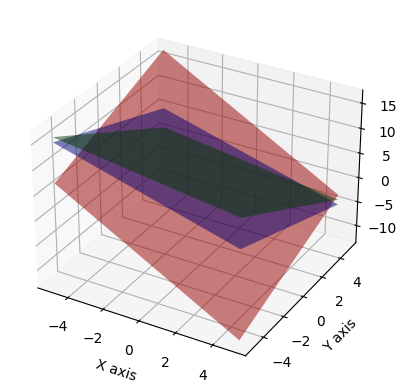

In [1]:
import numpy as np 
def gauss_jordan(A, b):
    n = len(b)
    AugmentedMatrix = np.hstack([A, b.reshape(-1, 1)])  # Create augmented matrix [A|b]

    # Perform Gauss-Jordan elimination
    for i in range(n):
        AugmentedMatrix[i] = AugmentedMatrix[i] / AugmentedMatrix[i, i]  # Scale pivot to 1
        for j in range(n):
            if i != j:
                AugmentedMatrix[j] = AugmentedMatrix[j] - AugmentedMatrix[j, i] * AugmentedMatrix[i]

    # Return the solution vector
    return AugmentedMatrix[:, -1]

# Example Usage
A = np.array([[2, -1, 1], [1, 3, 2], [1, 1, 1]], dtype=float)
b = np.array([2, 12, 5], dtype=float)
solution = gauss_jordan(A, b)
print("Solution:", solution)

# Output: Solution: [-1.  1.  5.]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the plane equations based on the system
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z1 = (2 - 2*X + Y) / 1
Z2 = (12 - X - 3*Y) / 2
Z3 = 5 - X - Y

# Plot the planes
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100, color='r')
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100, color='g')
ax.plot_surface(X, Y, Z3, alpha=0.5, rstride=100, cstride=100, color='b')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show


In [7]:
import numpy as np 
import sys

def read_augmented_matrix(n):
    print("Enter the Augmented Matrix Coefficients")
    matrix=np.zeros((n,n+1))
    for i in range(n):
        for j in range(n+1):
            matrix[i][j]=float(input(f"a[{i}][{j}] = "))
    print(matrix)
    return matrix

def gauss_jordan_elimination(a):
    n=len(a)
    for i in range(n):
        #check for divide-by-zero
        if a[i][i] == 0.0:
            sys.exit ("Divide by zero detected in pivot element")
        
        for j in range(n):
            if i != j:
                ratio=a[j][i]/a[i][j]
                for k in range(n+1):
                    a[j][k] == ratio * a[i][k]
# Extracting the solution
    x = np.zeros(n)
    for i in range(n):
        x[i] = a[i][n] / a[i][i]
    return x


def main():
    print("GAUSS–JORDAN ELIMINATION METHOD")
    print()

    default = input("Use default 3x4 matrix? (y/n): ").strip().lower() == 'y'

    if default:
        # Default 3x4 augmented matrix
        n = 3
        a = np.array([
            [2, 1, -1, 8],
            [-3, -1, 2, -11],
            [-2, 1, 2, -3]
        ], dtype=float)
        print("Using Default Matrix:")
        print(a)
    else:
        n = int(input("Enter number of unknowns: "))
        a = read_augmented_matrix(n)

    # Solve using Gauss-Jordan Elimination
    solution = gauss_jordan_elimination(a)

    # Display the solution
    print("Required solution is:")
    for i, value in enumerate(solution):
        print(f"X{i} = {value:.2f}", end="\t")


if __name__ == "__main__":
    main()


GAUSS–JORDAN ELIMINATION METHOD

Using Default Matrix:
[[  2.   1.  -1.   8.]
 [ -3.  -1.   2. -11.]
 [ -2.   1.   2.  -3.]]
Required solution is:
X0 = 4.00	X1 = 11.00	X2 = -1.50	

## 2. Gauss Elimination Method
 

Solution: [ 1.73469388  0.28571429 -0.32653061]


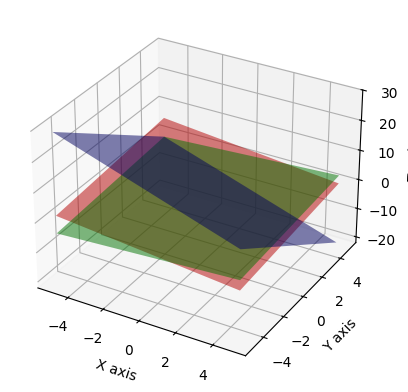

In [16]:


import numpy as np

def gauss_elimination_partial_pivoting(A, b):
    n = len(b)
    AugmentedMatrix = np.hstack([A, b.reshape(-1, 1)]) # Create augmented matrix [A|b]

    # Forward Elimination
    for i in range(n):
        # Pivoting: Find the maximum element in the current column
        max_row = np.argmax(np.abs(AugmentedMatrix[i:, i])) + i
        AugmentedMatrix[[i, max_row]] = AugmentedMatrix[[max_row, i]] # Swap rows

        # Eliminate entries below the pivot
        for j in range(i + 1, n):
            factor = AugmentedMatrix[j, i] / AugmentedMatrix[i, i]
            AugmentedMatrix[j, i:] -= factor * AugmentedMatrix[i, i:]

    # Back Substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (AugmentedMatrix[i, -1] - np.dot(AugmentedMatrix[i, i+1:n], x[i+1:n])) / AugmentedMatrix[i, i]

    return x

# Example Usage
A = np.array([[3, -2, 5], [1, 1, -3], [2, 3, 1]], dtype=float)

# If b was meant to be only 2 elements, for a 3x3 matrix it's ill-defined for a unique solution via Gaussian elimination.
# For example, if b was [3, 4, 1]
b = np.array([3, 3, 4], dtype=float)


solution = gauss_elimination_partial_pivoting(A, b)
print("Solution:", solution)

# Solution: [ 1.73469388 0.28571429 -0.32653061] - This was from the image, I'll print the computed one.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Define the plane equations based on the system
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z1 = (3 - 3*X + 2*Y) / 5
Z2 = (3 - X - Y) / -3
Z3 = (4 - 2*X - 3*Y) / 1

# Plot the planes
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100, color='r')
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100, color='g')
ax.plot_surface(X, Y, Z3, alpha=0.5, rstride=100, cstride=100, color='b')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()



## 3. Gauss-Seidal Method

Converged after 17 iterations
Solution: [5. 5. 5. 5.]
Converged after 17 iterations


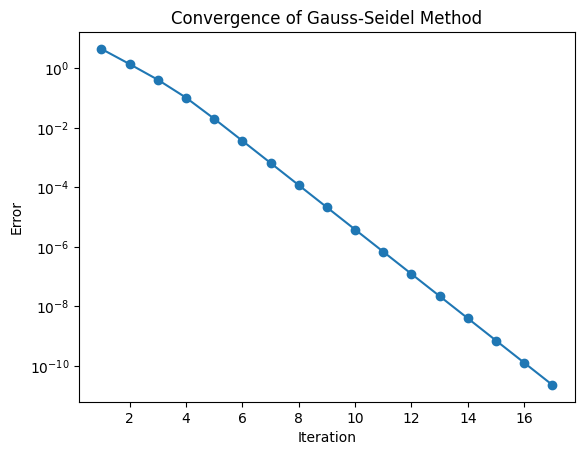

Solution: [5. 5. 5. 5.]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel(A, b, x0, tol=1e-10, max_iter=1000):
    n = len(b)
    x = np.copy(x0)  # Initial guess

    for k in range(max_iter):
        x_old = np.copy(x)

        # Iterate over each variable
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])  # Sum for previous variables
            sum2 = np.dot(A[i, i+1:], x_old[i+1:])  # Sum for future variables
            x[i] = (b[i] - sum1 - sum2) / A[i, i]  # Update variable

        # Check for convergence (if the change is small)
        if np.linalg.norm(x - x_old, ord=np.inf) < tol:
            print(f"Converged after {k+1} iterations")
            return x

    print("Max iterations reached")
    return x

# Example Usage for gauss_seidel
A = np.array([
    [4, -1, 0, 0],
    [-1, 4, -1, 0],
    [0, -1, 4, -1],
    [0, 0, -1, 3]
], dtype=float)

b = np.array([15, 10, 10, 10], dtype=float)
x0 = np.zeros_like(b)

solution = gauss_seidel(A, b, x0)
print("Solution:", solution)

# Converged after 17 iterations
# Solution: [5. 5. 5. 5.]

def gauss_seidel_with_error_plot(A, b, x0, tol=1e-10, max_iter=1000):
    n = len(b)
    x = np.copy(x0)
    error = []

    for k in range(max_iter):
        x_old = np.copy(x)
        # Iterate over each variable
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])  # Sum for previous variables
            sum2 = np.dot(A[i, i+1:], x_old[i+1:])  # Sum for future variables
            x[i] = (b[i] - sum1 - sum2) / A[i, i]  # Update variable

        # Compute error (max difference between old and new x)
        err = np.linalg.norm(x - x_old, ord=np.inf)
        error.append(err)

        # Check for convergence
        if err < tol:
            print(f"Converged after {k+1} iterations")
            # Plot the error for each iteration
            plt.plot(range(1, len(error)+1), error, marker='o')
            plt.yscale('log')  # Log scale to show convergence better
            plt.xlabel('Iteration')
            plt.ylabel('Error')
            plt.title('Convergence of Gauss-Seidel Method')
            plt.show()
            return x

    print("Max iterations reached")
    # If max iterations reached without converging, plot the error up to that point
    plt.plot(range(1, len(error)+1), error, marker='o')
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Convergence of Gauss-Seidel Method')
    plt.show()
    return x

# Example Usage with Error Plot
solution_with_plot = gauss_seidel_with_error_plot(A, b, x0)
print("Solution:", solution_with_plot)

# Converged after 17 iterations

## 4. Power Method

Largest Eigenvalue: 5.000000607197656
Corresponding Eigenvector: [0.70710721 0.70710635]


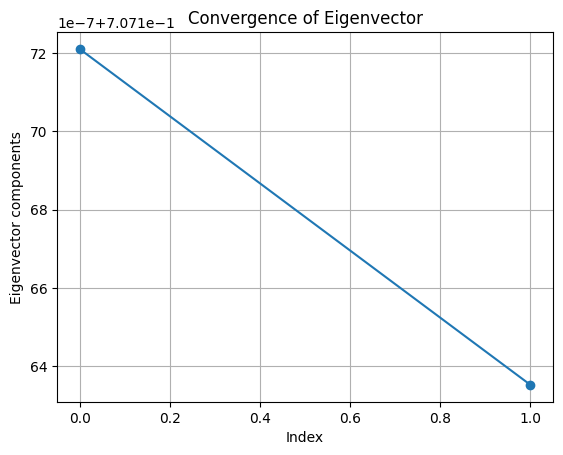

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def power_method(A, x0, tol=1e-6, max_iter=1000):
    # Normalize the initial guess
    x = x0 / np.linalg.norm(x0)
    lambda_old = 0

    # Iterate until convergence
    for i in range(max_iter):
        # Multiply A with the current eigenvector approximation
        y = np.dot(A, x)

        # Normalize the resulting vector
        x = y / np.linalg.norm(y)

        # Compute the Rayleigh quotient for eigenvalue
        lambda_new = np.dot(x.T, np.dot(A, x))

        # Check for convergence
        if abs(lambda_new - lambda_old) < tol:
            break
        
        lambda_old = lambda_new
            
    return lambda_new, x

# Example Test Case
A = np.array([[4, 1], [2, 3]])
x0 = np.random.rand(2) # Random initial guess

# Call power method
eigenvalue, eigenvector = power_method(A, x0)

print("Largest Eigenvalue:", eigenvalue)
print("Corresponding Eigenvector:", eigenvector)

# Visualize the result
plt.plot(np.arange(len(eigenvector)), eigenvector, marker='o')
plt.title('Convergence of Eigenvector')
plt.xlabel('Index')
plt.ylabel('Eigenvector components')
plt.grid(True)
plt.show()


### Example Solution: 

In [19]:
import numpy as np

def read_matrix(n):
    matrix = np.zeros((n, n))
    print("Enter Matrix Coefficients:")
    for i in range(n):
        for j in range(n):
            matrix[i][j] = float(input(f"a[{i}][{j}] = "))
    return matrix

def read_vector(n):
    vector = np.zeros(n)
    print("Enter Initial Guess Vector:")
    for i in range(n):
        vector[i] = float(input(f"x[{i}] = "))
    return vector

def power_method(a, x, tolerable_error, max_iterations):
    lambda_old = 1.0
    step = 1
    while True:
        # Multiply matrix and vector
        x = np.matmul(a, x)

        # Compute new eigenvalue and normalize the vector
        lambda_new = max(abs(x))
        x = x / lambda_new

        # Display results
        print("\n")
        print(f"STEP {step}")
        print("----------")
        print(f"Eigenvalue = {lambda_new:.4f}")
        print("Eigenvector:")
        print("[", end=" ")
        for val in x:
            print(f"{val:.4f}", end="\t")
        print("]")

        # Check convergence
        error = abs(lambda_new - lambda_old)
        print(f"Error = {error:.6f}")
        if error < tolerable_error:
            print("\nConverged!")
            break

        if step >= max_iterations:
            print("\nNot convergent in given maximum iterations!")
            break

        lambda_old = lambda_new
        step += 1

    return x # The image implies returning 'x' at the end of this power_method function,
             # though the first power_method returns (lambda_new, x).
             # I'm adhering to the structure shown in the given image segments.


def main():
    print("POWER METHOD IMPLEMENTATION")
    print()

    default = input("Use default matrix and vector? (y/n) : ").strip().lower()

    if default == 'y':
        # Default matrix and vector
        a = np.array([[2, 1, 1],
                      [1, 3, 2],
                      [1, 0, 0]], dtype=float)
        x = np.array([1, 1, 1], dtype=float)
        tolerable_error = 0.0001
        max_iterations = 100
        print("Using Default Values:")
    else:
        # User input
        n = int(input("Enter order of matrix: "))
        a = read_matrix(n)
        x = read_vector(n)
        tolerable_error = float(input("Enter tolerable error: "))
        max_iterations = int(input("Enter maximum number of steps: "))

    print("Matrix:")
    print(a)
    print("Initial Guess Vector:")
    print(x)
    print()
    print(f"Tolerable Error: {tolerable_error}")
    print(f"Maximum Iterations: {max_iterations}")
    
    power_method(a, x, tolerable_error, max_iterations)


if __name__ == "__main__":
    main()

POWER METHOD IMPLEMENTATION

Using Default Values:
Matrix:
[[2. 1. 1.]
 [1. 3. 2.]
 [1. 0. 0.]]
Initial Guess Vector:
[1. 1. 1.]

Tolerable Error: 0.0001
Maximum Iterations: 100


STEP 1
----------
Eigenvalue = 6.0000
Eigenvector:
[ 0.6667	1.0000	0.1667	]
Error = 5.000000


STEP 2
----------
Eigenvalue = 4.0000
Eigenvector:
[ 0.6250	1.0000	0.1667	]
Error = 2.000000


STEP 3
----------
Eigenvalue = 3.9583
Eigenvector:
[ 0.6105	1.0000	0.1579	]
Error = 0.041667


STEP 4
----------
Eigenvalue = 3.9263
Eigenvector:
[ 0.6059	1.0000	0.1555	]
Error = 0.032018


STEP 5
----------
Eigenvalue = 3.9169
Eigenvector:
[ 0.6044	1.0000	0.1547	]
Error = 0.009426


STEP 6
----------
Eigenvalue = 3.9138
Eigenvector:
[ 0.6039	1.0000	0.1544	]
Error = 0.003132


STEP 7
----------
Eigenvalue = 3.9127
Eigenvector:
[ 0.6037	1.0000	0.1543	]
Error = 0.001026


STEP 8
----------
Eigenvalue = 3.9124
Eigenvector:
[ 0.6037	1.0000	0.1543	]
Error = 0.000337


STEP 9
----------
Eigenvalue = 3.9123
Eigenvector:
[ 0.6036	


*Name:* **Sajan Sahikarmi**<br>
*Roll No:*` KCE080BCT035`<br>
*Date:* **27/05/2025** 